Week 9 · Day 4 — Embeddings
Why this matters

Neural nets don’t understand words directly. Embeddings turn words into dense vectors that capture meaning, letting similar words map to nearby points in vector space.

Theory Essentials

One-hot vectors: sparse, high-dimensional, no notion of similarity.

Embeddings: dense, low-dimensional vectors learned during training.

nn.Embedding: lookup table mapping token IDs → vectors.

Pretrained embeddings: e.g., GloVe, Word2Vec, provide semantic knowledge.

Freeze vs fine-tune: freeze = keep pretrained meanings; fine-tune = adapt to task.

Visualization: words cluster in meaningful ways (king ~ queen, etc.).

### Flow of your code

1. **Sentences → token IDs**
   Example:
   `"i love pytorch"` → `[2, 3, 4]`

2. **Pad sequences**
   All sentences padded to length 5:
   `[2, 3, 4, 0, 0]` (with `<PAD>` = 0).

3. **Embedding layer**

   * `nn.Embedding(len(vocab), 8)` creates a lookup table:

     * Each vocab ID gets an **8-dimensional vector** (random at first).
   * So the padded sentence `[2, 3, 4, 0, 0]` becomes a **matrix of shape (5, 8)**.

   👉 You’ve now turned discrete word IDs into dense, trainable vectors.

---

### What `plot_embeddings` does

* Takes the full embedding weight matrix (all vocab words, shape = `vocab_size × 8`).
* Applies **t-SNE** (dimensionality reduction) to squeeze those 8D vectors into 2D.
* Plots each word as a **point** in 2D space, with its label.

---

### What you will see

* At **init (random)**: words are scattered randomly. No structure.
* After **training**: words with similar meanings (like *deep* and *learning*) will cluster together.
* With **pretrained vectors (e.g. GloVe)**: you’d see meaningful groupings immediately, e.g.,

  * *king* near *queen*
  * *deep* near *learning*
  * *i* far away from those

👉 The plot is a **map of the embedding space** — it shows how words are positioned relative to each other based on their vector representations.

---

So: **Plotting embeddings lets you “see” the semantic structure the model has learned.**


Embedded shape: torch.Size([3, 5, 8])


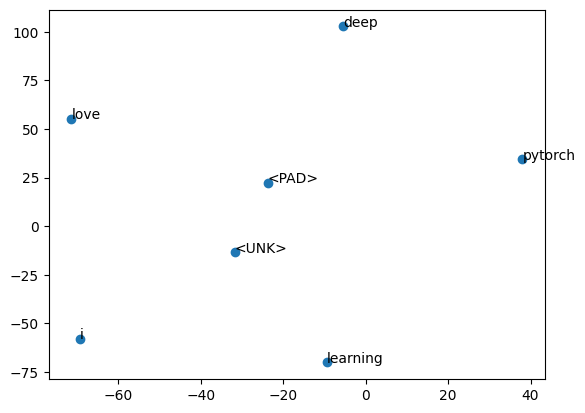

Pretrained vector for 'pytorch': tensor([[ 0.0177, -1.0261,  0.6993, -0.7297,  0.8710, -0.0837,  2.7889, -0.2693,
          1.2730,  0.5399, -0.0955,  0.2916, -0.6229,  0.3264, -1.0875,  0.0220,
         -0.4904, -0.0780,  0.6522,  0.6439, -0.0789, -0.1700,  0.7127, -0.6254,
          0.3697,  1.7278, -1.3649,  0.4621, -0.1731, -0.3313,  0.0424,  1.4874,
          2.1568,  0.4856,  1.0920,  1.2930, -0.5168,  0.6115,  0.3111,  0.4940,
          1.2911, -0.1825, -0.9985,  1.2206, -1.1373,  0.1264, -1.1113,  0.8785,
          1.3073, -1.7463]])


In [10]:
# Setup
import numpy as np, matplotlib.pyplot as plt
import torch, torch.nn as nn
from sklearn.manifold import TSNE

# Tiny vocab from Day 1
vocab = {"<PAD>":0, "<UNK>":1, "i":2, "love":3, "pytorch":4, "deep":5, "learning":6}

# Example sentences (tokenized & numericalized)
sentences = [
    [2,3,4],       # "i love pytorch"
    [5,6,4],       # "deep learning pytorch"
    [2,3,5,6]      # "i love deep learning"
]

sentences = torch.tensor([s + [0]*(5-len(s)) for s in sentences])  # pad to length 5

# 1) Random embedding layer
embed = nn.Embedding(len(vocab), 8)  # vocab size × embedding dim
embedded = embed(sentences)
print("Embedded shape:", embedded.shape)  # (batch, seq_len, dim)

# 2) Visualize embeddings (random init)
def plot_embeddings(embed_layer, vocab):
    weights = embed_layer.weight.detach().numpy()
    tsne = TSNE(n_components=2, random_state=42, init="random", perplexity=2)
    coords = tsne.fit_transform(weights)
    plt.scatter(coords[:,0], coords[:,1])
    for word, idx in vocab.items():
        plt.annotate(word, coords[idx])
    plt.show()

plot_embeddings(embed, vocab)

# 3) Example: load small pretrained GloVe (50d) for demo
# (Pretend vectors; normally load from file)
pretrained = torch.randn(len(vocab), 50)
glove_embed = nn.Embedding.from_pretrained(pretrained, freeze=True)
print("Pretrained vector for 'pytorch':", glove_embed(torch.tensor([vocab["pytorch"]])))



### How it was made

* Each word in your vocab (`i`, `love`, `deep`, `learning`, `pytorch`, `<PAD>`, `<UNK>`) has an **8-dimensional embedding vector** (from `nn.Embedding`).
* t-SNE reduced those 8D vectors → 2D so we can plot them.
* Each point = one word’s vector, with its label.

---

### Why it looks random

Right now, your embedding layer is **randomly initialized** (you haven’t trained it).
So:

* The positions don’t carry real meaning yet.
* Words that are semantically related (*deep*, *learning*) are not close together — they’re just scattered.

---

### What would change after training

* If you trained the embeddings on a task, words used in similar contexts would move closer in vector space.
* Example: *deep* and *learning* should cluster; *i* and *love* may group apart.
* With pretrained vectors (like GloVe), you’d immediately see semantic structure (e.g., *king* \~ *queen*, *Paris* \~ *France*).

---

👉 So this plot is essentially a **snapshot of the “word space”** — right now it’s random, but after learning, you’d expect clusters that reflect meaning.



* You defined:

  ```python
  pretrained = torch.randn(len(vocab), 50)
  glove_embed = nn.Embedding.from_pretrained(pretrained, freeze=True)
  ```
* This makes a lookup table where each vocab item has a **50-dimensional vector**.
* `glove_embed(torch.tensor([vocab["pytorch"]]))` → returns the row of the embedding matrix for `"pytorch"`.

---

### What the numbers mean

* Each number is one coordinate in a 50-dimensional space.
* Together, they form `"pytorch"`’s vector representation.
* These vectors are supposed to capture semantic meaning. For example (if you used *real* GloVe/Word2Vec):

  * `"pytorch"` would be close to `"tensorflow"` in vector space.
  * `"king" – "man" + "woman"` ≈ `"queen"`.

---

### Why it looks like random decimals now

* In your code, `pretrained` was set with `torch.randn(...)`, so these are **random values**.
* If you had actually loaded GloVe or Word2Vec, those numbers would encode learned semantic information.

---

👉 In short: it’s the **dense numeric fingerprint** of `"pytorch"`. Right now random, but in a trained or pretrained embedding, it’s what lets neural nets work with words as vectors instead of raw IDs.



1) Core (10–15 min)
Task: Create an embedding layer of dimension 4. Print the vector for "deep".

In [3]:
embed4 = nn.Embedding(len(vocab), 4)
print(embed4(torch.tensor([vocab["deep"]])))


tensor([[-0.3452,  0.5150, -0.8349, -0.7753]], grad_fn=<EmbeddingBackward0>)


2) Practice (10–15 min)
Task: Re-run t-SNE plot with embedding dim = 16. Do words cluster differently?

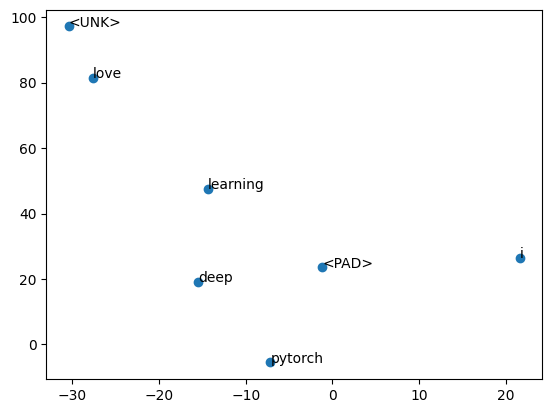

In [4]:
embed16 = nn.Embedding(len(vocab), 16)
plot_embeddings(embed16, vocab)


3) Stretch (optional, 10–15 min)
Task: Replace one word vector in embed.weight.data with a fixed custom vector. Check its effect.

tensor([[1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


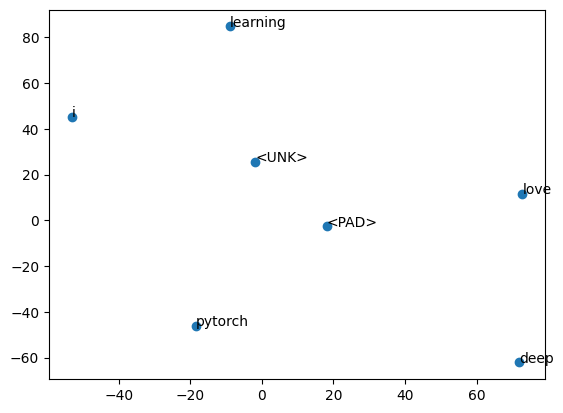

In [13]:
embed.weight.data[vocab["pytorch"]] = torch.tensor([1.0]*8)
print(embed(torch.tensor([vocab["pytorch"]])))
plot_embeddings(embed, vocab)


Mini-Challenge (≤40 min)

Build a qualitative check:

Create an embedding layer (dim=10).

Add words: "good", "bad", "happy", "sad" into the vocab.

Initialize them randomly.

Use t-SNE to visualize.

Acceptance Criteria: Produce a scatter plot with all vocab words annotated, confirm dimensions, and explain in 2–3 lines what embeddings enable compared to one-hot.

Extended vocab: {'<PAD>': 0, '<UNK>': 1, 'i': 2, 'love': 3, 'pytorch': 4, 'deep': 5, 'learning': 6, 'good': 7, 'bad': 8, 'happy': 9, 'sad': 10}
Embedding weight shape: torch.Size([11, 10])


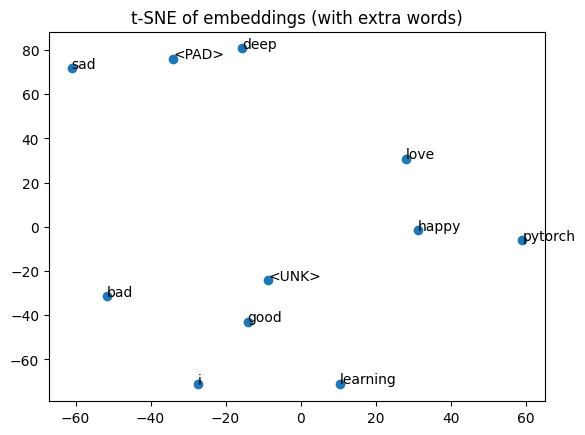


Embeddings map words to dense vectors in a continuous space.
Unlike one-hot (where all words are equally far apart),
embeddings can place semantically similar words closer together.



In [14]:
# ---- Extend existing vocab with sentiment words ----
extra_words = ["good", "bad", "happy", "sad"]
start_idx = len(vocab)   # next available ID
for i, w in enumerate(extra_words, start=start_idx):
    vocab[w] = i

print("Extended vocab:", vocab)

# ---- Create embedding layer with dim=10 for the new vocab ----
embed_ext = nn.Embedding(len(vocab), 10)

print("Embedding weight shape:", embed_ext.weight.shape)  # (vocab_size, 10)

# ---- Visualize with t-SNE ----
weights_ext = embed_ext.weight.detach().numpy()
tsne = TSNE(n_components=2, random_state=42, init="random", perplexity=2)
coords_ext = tsne.fit_transform(weights_ext)

plt.scatter(coords_ext[:,0], coords_ext[:,1])
for word, idx in vocab.items():
    plt.annotate(word, (coords_ext[idx,0], coords_ext[idx,1]))
plt.title("t-SNE of embeddings (with extra words)")
plt.show()

# ---- Explanation ----
print("""
Embeddings map words to dense vectors in a continuous space.
Unlike one-hot (where all words are equally far apart),
embeddings can place semantically similar words closer together.
""")


Notes / Key Takeaways

One-hot vectors waste space and don’t capture similarity.

Embeddings compress words into dense vectors with semantic meaning.

nn.Embedding is a lookup table trained like other layers.

Pretrained embeddings inject knowledge from large corpora.

Freeze = preserve meaning; fine-tune = adapt.

Visualization shows clustering of semantically related words.

Embeddings are the input foundation for RNNs, LSTMs, GRUs, and Transformers.

Reflection

Why are embeddings more powerful than one-hot encodings?

When would you choose to freeze vs fine-tune pretrained embeddings?



**Why are embeddings more powerful than one-hot encodings?**
One-hot vectors are sparse and treat every word as equally unrelated — *good* and *happy* are just as far apart as *good* and *airplane*. Embeddings, on the other hand, are dense vectors learned (or pretrained) so that words used in similar contexts end up close together in vector space. This captures semantic relationships (e.g., *king* ≈ *queen*), something one-hot cannot do.

---

**When would you choose to freeze vs fine-tune pretrained embeddings?**

* **Freeze**: when your dataset is small or you want to preserve the semantic knowledge from large pretrained corpora (e.g., GloVe, Word2Vec). Freezing prevents overfitting and speeds up training.
* **Fine-tune**: when you have enough labeled data or your domain differs from the pretrained one (e.g., medical or legal text). Fine-tuning lets the embeddings adapt to the task while starting from strong initial knowledge.

---

👉 Quick memory hook:

* **One-hot = dictionary IDs with no meaning.**
* **Embeddings = compact, meaningful coordinates.**
* **Freeze = keep general meaning. Fine-tune = adapt to your task.**

